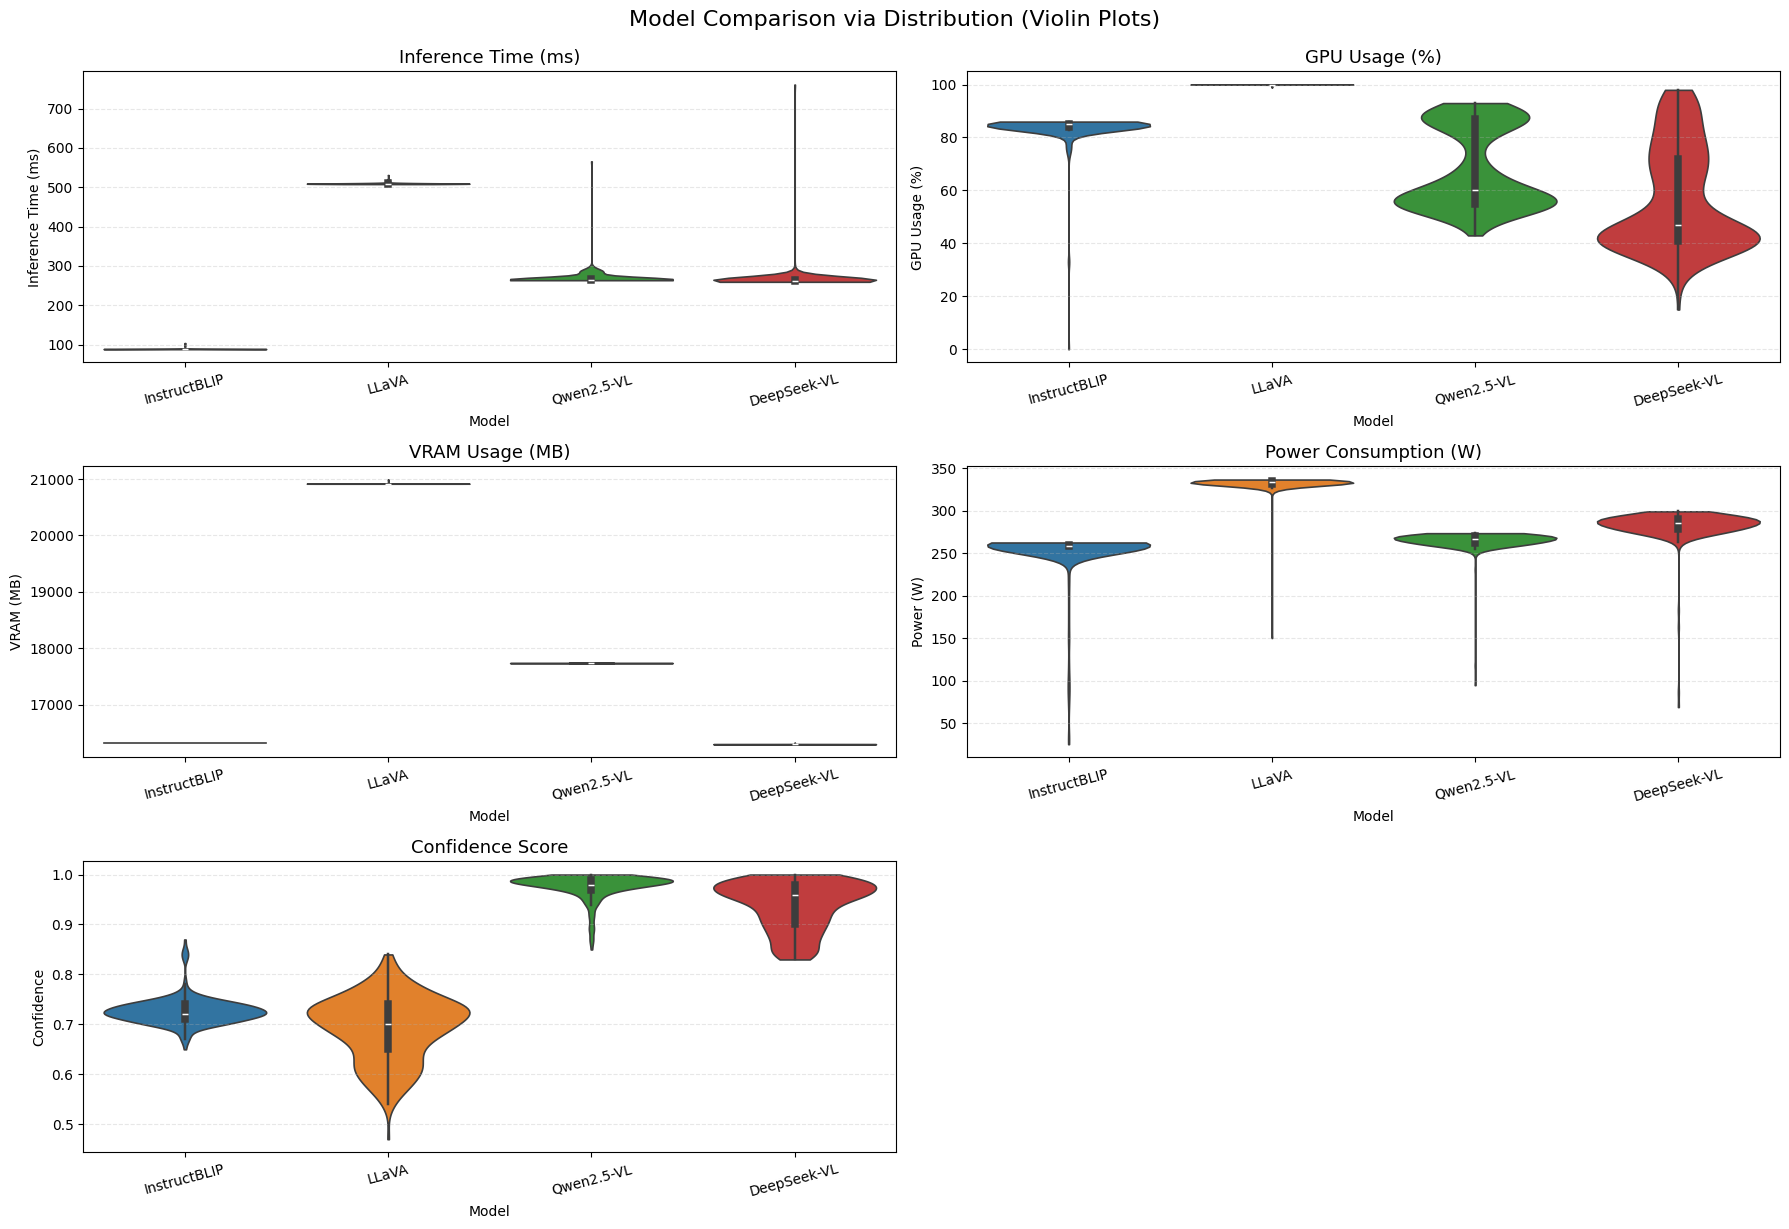

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths to your model logs
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# 📦 Load and tag
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)
    else:
        print(f" Missing log for {model_name}: {path}")

# Merge
combined_df = pd.concat(dfs, ignore_index=True)

#  Ensure proper numeric format
numeric_cols = ["GPU Usage (%)", "VRAM (MB)", "Power (W)", "Inference Time (ms)", "Confidence"]
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")

#  Violin plots
plt.figure(figsize=(18, 12))
metrics = {
    "Inference Time (ms)": "Inference Time (ms)",
    "GPU Usage (%)": "GPU Usage (%)",
    "VRAM (MB)": "VRAM Usage (MB)",
    "Power (W)": "Power Consumption (W)",
    "Confidence": "Confidence Score"
}

for i, (metric, title) in enumerate(metrics.items(), 1):
    plt.subplot(3, 2, i)
    sns.violinplot(
        data=combined_df,
        x="Model",
        y=metric,
        hue="Model",
        legend=False,
        inner="box",   # Show median + quartiles
        cut=0,         # Don’t extend beyond observed range
        linewidth=1.2
    )
    plt.title(title, fontsize=13)
    plt.xticks(rotation=15)
    plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.suptitle("Model Comparison via Distribution (Violin Plots)", fontsize=16, y=1.02)
plt.show()

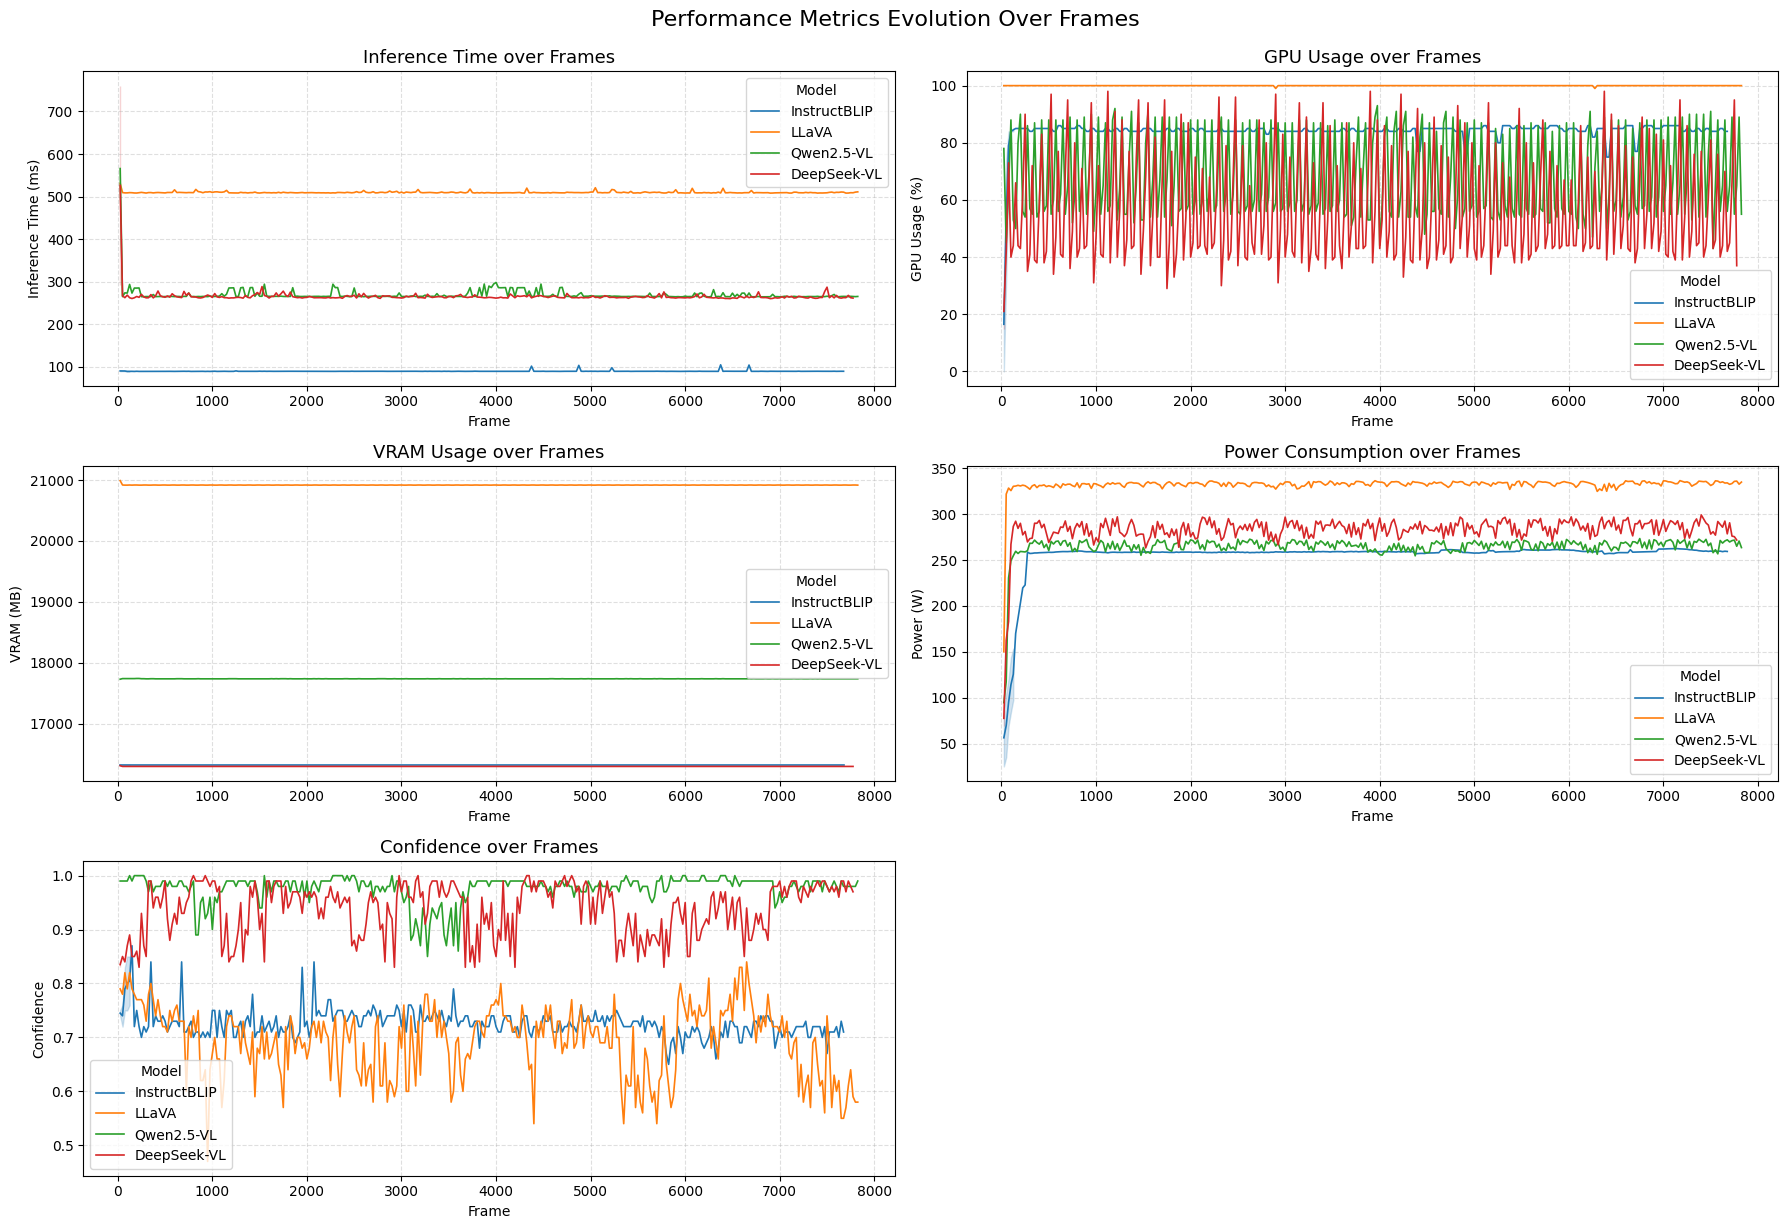

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Percorsi dei file CSV dei modelli
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# Caricamento dei dati con etichettatura
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)
    else:
        print(f"⚠️ File mancante per {model_name} in {path}")

# Unione dei dataframe (se presenti)
if not dfs:
    raise ValueError("Nessun file CSV trovato per i modelli specificati.")
combined_df = pd.concat(dfs, ignore_index=True)

# Conversione colonne numeriche
numeric_cols = ["Frame", "GPU Usage (%)", "VRAM (MB)", "Power (W)", "Inference Time (ms)", "Confidence"]
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors="coerce")

# Definizione delle metriche da tracciare
metrics = {
    "Inference Time (ms)": "Inference Time over Frames",
    "GPU Usage (%)": "GPU Usage over Frames",
    "VRAM (MB)": "VRAM Usage over Frames",
    "Power (W)": "Power Consumption over Frames",
    "Confidence": "Confidence over Frames"
}

# Plot
plt.figure(figsize=(18, 12))
for i, (metric, title) in enumerate(metrics.items(), 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=combined_df, x="Frame", y=metric, hue="Model", linewidth=1.2)
    plt.title(title, fontsize=13)
    plt.xlabel("Frame")
    plt.ylabel(metric)
    plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.suptitle("Performance Metrics Evolution Over Frames", fontsize=16, y=1.02)
plt.show()

/tmp/ipykernel_54003/1572419384.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


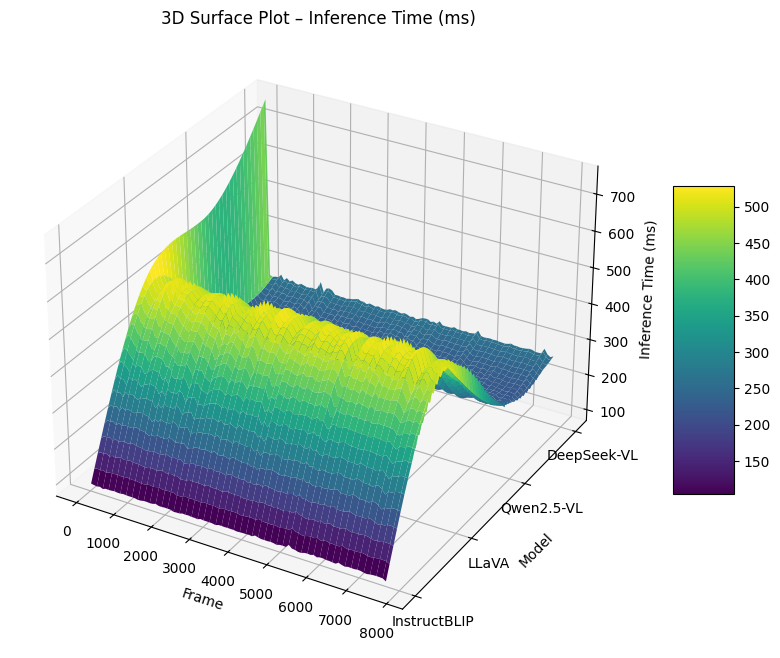

/tmp/ipykernel_54003/1572419384.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


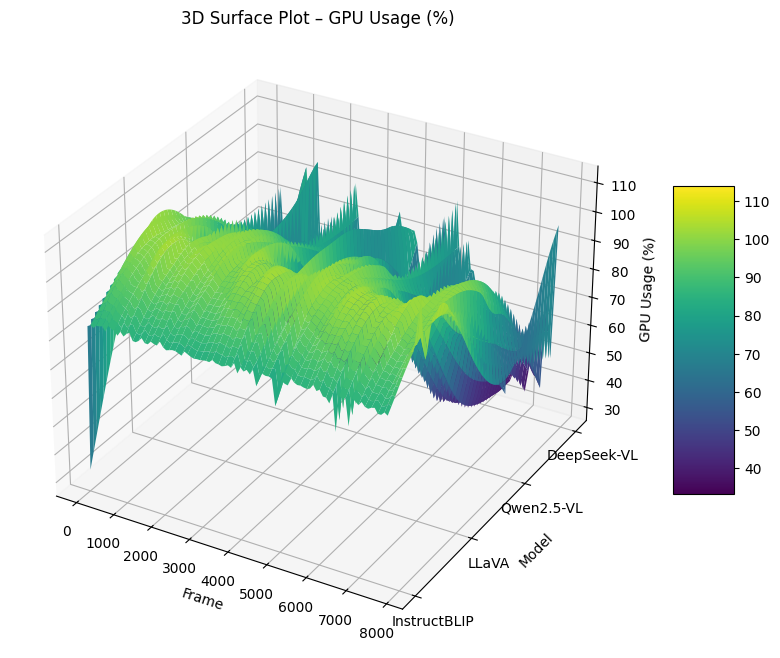

/tmp/ipykernel_54003/1572419384.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


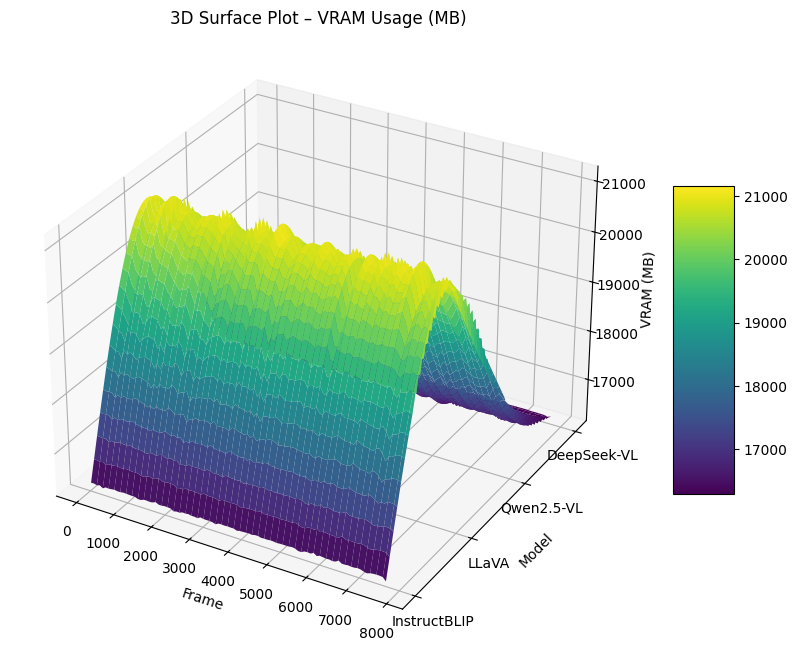

/tmp/ipykernel_54003/1572419384.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


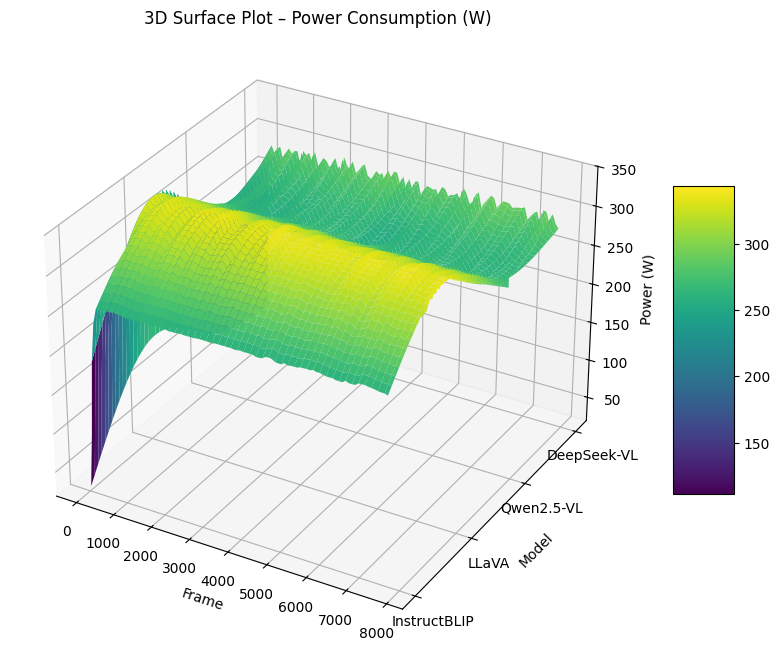

/tmp/ipykernel_54003/1572419384.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


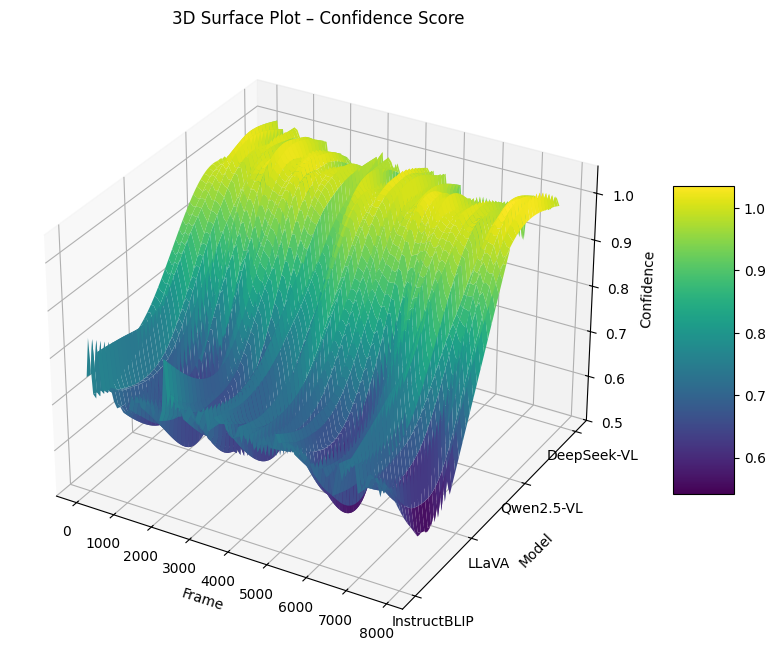

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
import os

# Percorsi ai log dei 4 modelli
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# Carica i CSV
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Mappa modelli a numeri
combined_df["Frame"] = combined_df["Frame"].astype(int)
model_to_id = {name: idx for idx, name in enumerate(combined_df["Model"].unique())}
combined_df["Model_ID"] = combined_df["Model"].map(model_to_id)

# Lista delle metriche da visualizzare
metrics = {
    "Inference Time (ms)": "Inference Time (ms)",
    "GPU Usage (%)": "GPU Usage (%)",
    "VRAM (MB)": "VRAM Usage (MB)",
    "Power (W)": "Power Consumption (W)",
    "Confidence": "Confidence Score"
}

# Visualizza ogni metrica
for metric_col, plot_title in metrics.items():
    if metric_col not in combined_df.columns:
        continue
    
    combined_df[metric_col] = combined_df[metric_col].astype(float)

    # Griglia interpolata
    grid_x, grid_y = np.meshgrid(
        np.linspace(combined_df["Frame"].min(), combined_df["Frame"].max(), 100),
        np.linspace(0, len(model_to_id)-1, 100)
    )
    points = combined_df[["Frame", "Model_ID"]].values
    values = combined_df[metric_col].values
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

    # Plot 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap=cm.viridis, linewidth=0, antialiased=True)

    # Font size updates
    ax.set_xlabel("Frame", fontsize=24)
    ax.set_ylabel("Model", fontsize=24)
    ax.set_zlabel(metric_col, fontsize=24)
    ax.set_title(f"3D Surface Plot – {plot_title}", fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=20)  # increase tick labels
    ax.set_yticks(list(model_to_id.values()))
    ax.set_yticklabels(list(model_to_id.keys()), fontsize=20)

    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.ax.tick_params(labelsize=20)

    plt.tight_layout()
    plt.show()

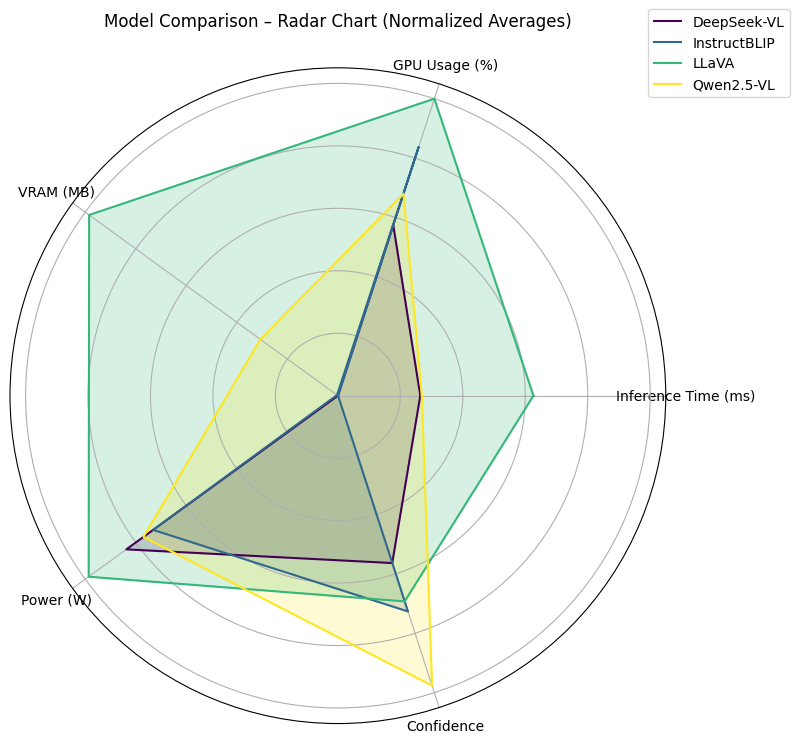

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Update these paths to your real logs
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# Load and tag each DataFrame
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)
    else:
        print(f"⚠️ File not found: {path}")

if not dfs:
    raise ValueError("No CSV logs found. Please check your paths.")

# Merge available logs
combined_df = pd.concat(dfs, ignore_index=True)

# Metrics to compare
metrics = ["Inference Time (ms)", "GPU Usage (%)", "VRAM (MB)", "Power (W)", "Confidence"]

# Normalize metrics (min-max scaling)
normalized = combined_df.copy()
for metric in metrics:
    min_val = combined_df[metric].min()
    max_val = combined_df[metric].max()
    normalized[metric] = (combined_df[metric] - min_val) / (max_val - min_val)

# Aggregate mean values per model
mean_metrics = normalized.groupby("Model")[metrics].mean()

# Prepare radar chart
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Loop back to start

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_metrics)))

for idx, (model, row) in enumerate(mean_metrics.iterrows()):
    values = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, values, label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.2, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Comparison – Radar Chart (Normalized Averages)", pad=30)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

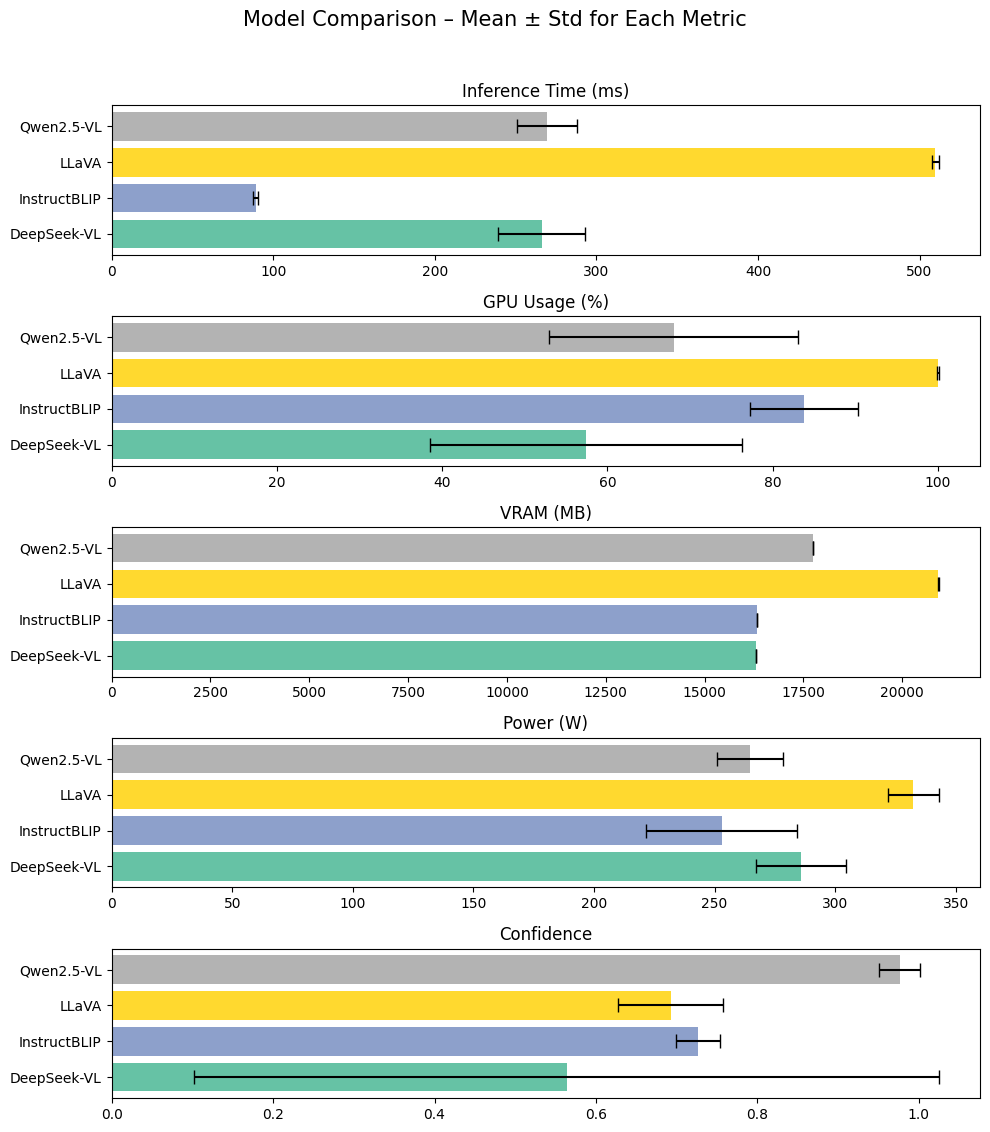

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths to your logs (fill in real paths)
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# Load and tag data
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

# Metrics to summarize
metrics = ["Inference Time (ms)", "GPU Usage (%)", "VRAM (MB)", "Power (W)", "Confidence"]

# Ensure numeric types
for metric in metrics:
    df_all[metric] = pd.to_numeric(df_all[metric], errors="coerce")

# Aggregate: mean and std per model
summary = df_all.groupby("Model")[metrics].agg(["mean", "std"]).reset_index()

# Flatten columns
summary.columns = ['Model'] + [f"{m} {s}" for m in metrics for s in ["mean", "std"]]

# Plotting
n_metrics = len(metrics)
fig, axes = plt.subplots(nrows=n_metrics, figsize=(10, 2.3 * n_metrics), sharex=False)
fig.suptitle("Model Comparison – Mean ± Std for Each Metric", fontsize=15)

colors = plt.cm.Set2(np.linspace(0, 1, len(summary)))

for i, metric in enumerate(metrics):
    ax = axes[i]
    means = summary[f"{metric} mean"]
    stds = summary[f"{metric} std"]
    models = summary["Model"]

    ax.barh(models, means, xerr=stds, color=colors, capsize=5)
    ax.set_title(metric)
    ax.set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

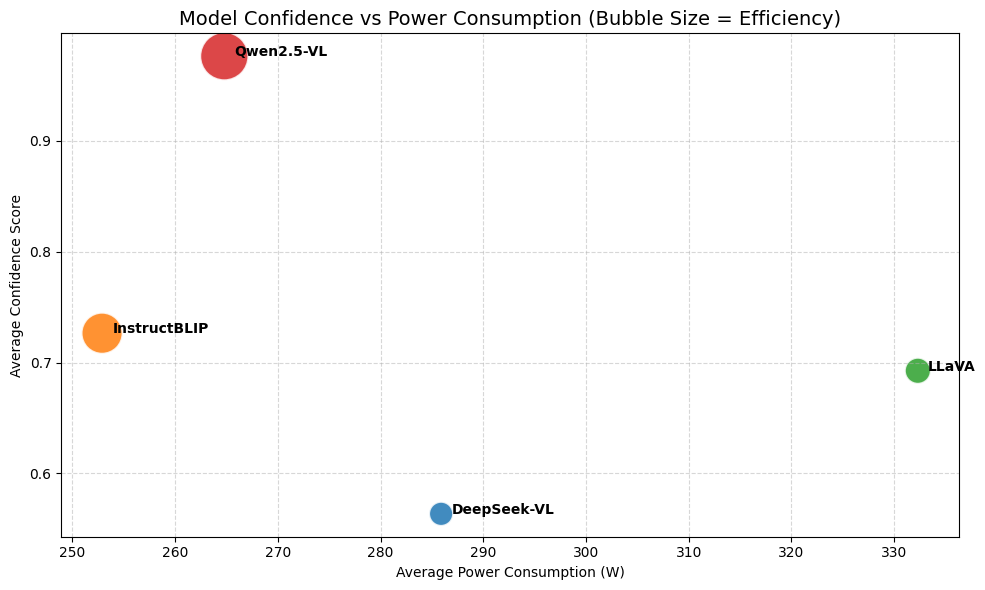

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define logs
model_logs = {
    "InstructBLIP": "results_person/performance_log.csv",
    "LLaVA": "results_llava/performance_log.csv",
    "Qwen2.5-VL": "results_qwen/performance_log.csv",
    "DeepSeek-VL": "results_deepseek/performance_log.csv"
}

# Load logs
dfs = []
for model_name, path in model_logs.items():
    if os.path.isfile(path):
        df = pd.read_csv(path)
        df["Model"] = model_name
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Ensure types
combined_df["Power (W)"] = combined_df["Power (W)"].astype(float)
combined_df["Confidence"] = combined_df["Confidence"].astype(float)
combined_df["Confidence/W"] = combined_df["Confidence"] / combined_df["Power (W)"]

# Aggregate
agg_df = combined_df.groupby("Model").agg({
    "Confidence": "mean",
    "Power (W)": "mean",
    "Confidence/W": "mean"
}).reset_index().rename(columns={
    "Confidence": "Avg Confidence",
    "Power (W)": "Avg Power",
    "Confidence/W": "Efficiency"
})

# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=agg_df,
    x="Avg Power",
    y="Avg Confidence",
    size="Efficiency",
    hue="Model",
    sizes=(300, 1200),
    palette="tab10",
    legend=False,  # REMOVE the autogenerated legend
    alpha=0.85
)

# Annotate points with model names
for _, row in agg_df.iterrows():
    plt.text(row["Avg Power"] + 1, row["Avg Confidence"], row["Model"], fontsize=10, weight="bold")

# Final touches
plt.title("Model Confidence vs Power Consumption (Bubble Size = Efficiency)", fontsize=14)
plt.xlabel("Average Power Consumption (W)")
plt.ylabel("Average Confidence Score")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()